<a href="https://colab.research.google.com/github/MysticDeepAI/AGNOSTIC-METHODS-FOR-INTERPRETABILITY-IN-MACHINE-LEARNING-a-systematic-review/blob/main/DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import requests
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [176]:
import requests

# URL del archivo en modo Raw
url = 'https://github.com/MysticDeepAI/AGNOSTIC-METHODS-FOR-INTERPRETABILITY-IN-MACHINE-LEARNING-a-systematic-review/raw/main/Data_review.xlsx'
response = requests.get(url)
if response.status_code == 200:
    with open('Data_review.xlsx', 'wb') as f:
        f.write(response.content)



# **ABSTRACTS ANALYSIS**

In [177]:
consolidate = pd.read_excel('/content/Data_review.xlsx')


Frecuence of words

In [103]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [104]:
from nltk import pos_tag

In [125]:
l,v = zip(*tagged_tokens)

In [128]:
z = list(l)

In [129]:
z

['a', 'tener', 'en', 'cuenta']

In [132]:
abstracts = df['ABSTRACT'].dropna()


stop_words = set(stopwords.words('english'))

word_freq = Counter()
filtered_tokens = []
documents = []

for abstract in abstracts:
    if isinstance(abstract, str):

        tokens = abstract.lower().split()
        tagged_tokens = pos_tag(tokens)
        document = []

        for word,tag in tagged_tokens:
          if word.isalpha() and word not in stop_words and not tag.startswith('V'): #is necesary filter more?
            filtered_tokens.append(word)
            document.append(word)
        documents.append(document)


        word_freq.update(filtered_tokens)

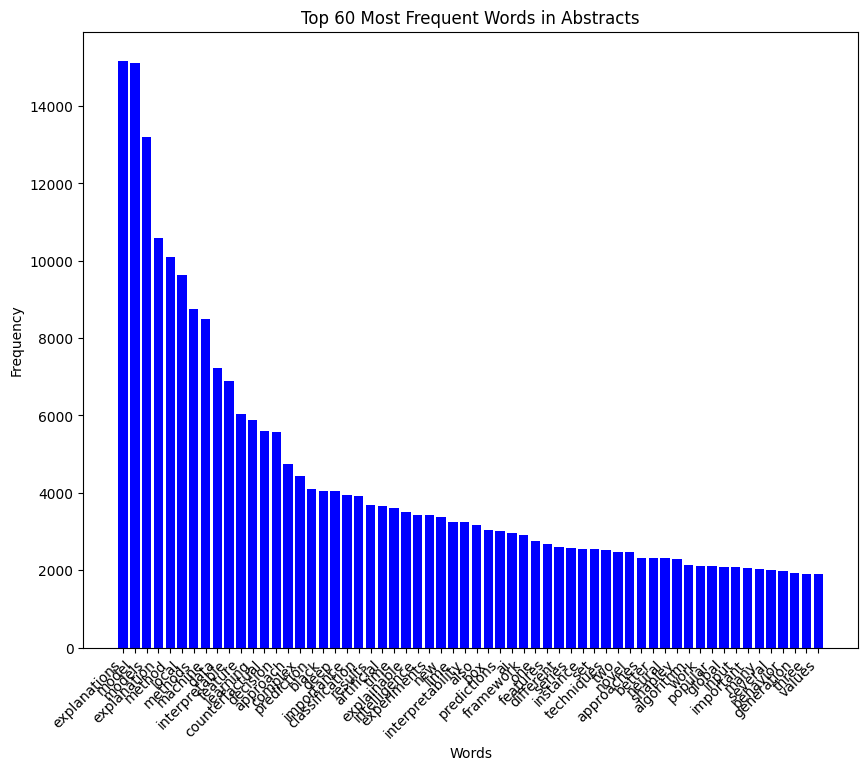

In [111]:
n_most_common = 60
most_common_words = word_freq.most_common(n_most_common)

# Separar las palabras y sus frecuencias en dos listas
words, frequencies = zip(*most_common_words)

# Crear un diagrama de barras
plt.figure(figsize=(10, 8))  # Ajusta el tamaño del gráfico si es necesario
plt.bar(words, frequencies, color='blue')  # Puedes cambiar el color si quieres

# Agregar título y etiquetas a los ejes
plt.title(f'Top {n_most_common} Most Frequent Words in Abstracts')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Mejorar la legibilidad de las etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


Analisis de clustering

with glove

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Lista de palabras filtradas (asegúrate de que esta lista está llena con palabras alfabéticas no stopwords)
# filtered_tokens = [...]

# Cargar el modelo de embeddings preentrenado
print("Cargando el modelo de embeddings preentrenado...")
model = api.load('glove-wiki-gigaword-50')

Filtrando palabras...
Obteniendo embeddings para las palabras filtradas...
Aplicando K-Means clustering...
Reduciendo dimensionalidad con PCA...
Creando gráfico de dispersión...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


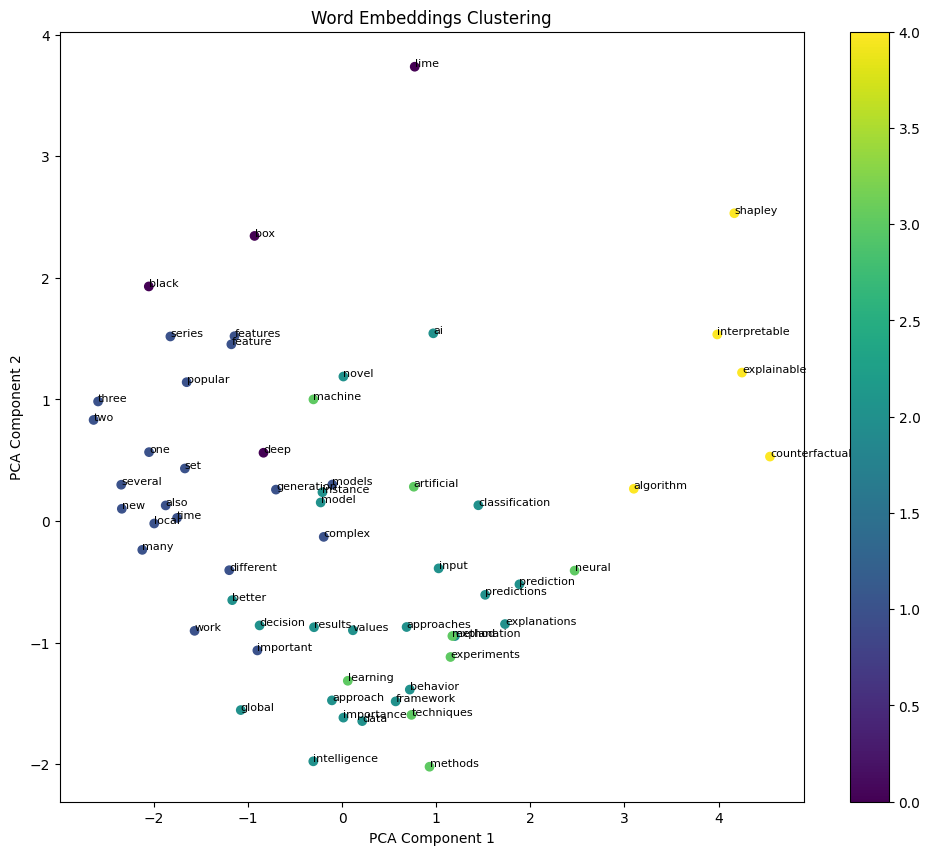

In [117]:

# Filtrar palabras que están en el modelo

pca_data = words
filtered_words = [word for word in pca_data if word in model]

embeddings = np.array([model[word] for word in filtered_words])

# Verificar si hay suficientes muestras para el clustering
n_clusters = 5
if len(embeddings) < n_clusters:
    print(f"No hay suficientes muestras para realizar clustering con {n_clusters} clusters.")
else:
    # Configurar K-Means
    print("Aplicando K-Means clustering...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(embeddings)

    # Reducir la dimensionalidad para visualización usando PCA
    print("Reduciendo dimensionalidad con PCA...")
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Crear un scatter plot con las palabras
    print("Creando gráfico de dispersión...")
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=kmeans.labels_, cmap='viridis')

    # Añadir etiquetas a cada punto
    for i, word in enumerate(filtered_words):
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=8)

    plt.colorbar(scatter)
    plt.title("Word Embeddings Clustering")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


With bert

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Definir tu lista de palabras filtradas
# filtered_tokens = [...]

# Cargar el modelo y el tokenizador de BERT
print("Cargando el modelo y el tokenizador de BERT...")
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

In [ ]:
# Definir una función para obtener embeddings de BERT
def get_bert_embeddings(words):
    inputs = tokenizer(words, return_tensors='pt', padding=True, truncation=True, max_length=10)
    with torch.no_grad():
        outputs = model(**inputs)
    # Usar la media de la última capa oculta como el embedding
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.numpy()

Obteniendo embeddings para las palabras filtradas...
Aplicando K-Means clustering...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Reduciendo dimensionalidad con PCA...
Creando gráfico de dispersión...


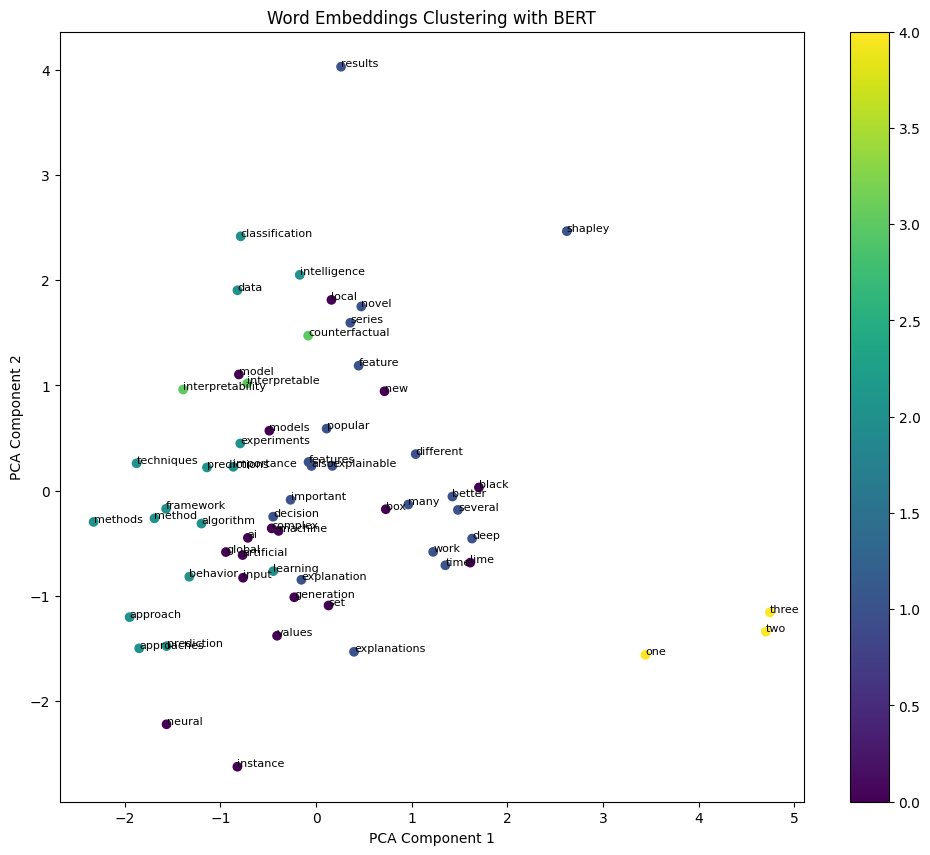

In [120]:
# Obtener embeddings para las palabras filtradas
print("Obteniendo embeddings para las palabras filtradas...")
embeddings = get_bert_embeddings(pca_data)

# Verificar si hay suficientes muestras para el clustering
n_clusters = 5
if len(embeddings) < n_clusters:
    print(f"No hay suficientes muestras para realizar clustering con {n_clusters} clusters.")
else:
    # Configurar K-Means
    print("Aplicando K-Means clustering...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(embeddings)

    # Reducir la dimensionalidad para visualización usando PCA
    print("Reduciendo dimensionalidad con PCA...")
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Crear un scatter plot con las palabras
    print("Creando gráfico de dispersión...")
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=kmeans.labels_, cmap='viridis')

    # Añadir etiquetas a cada punto
    for i, word in enumerate(pca_data):
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=8)

    plt.colorbar(scatter)
    plt.title("Word Embeddings Clustering with BERT")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


Word cloud

In [51]:
!pip install wordcloud


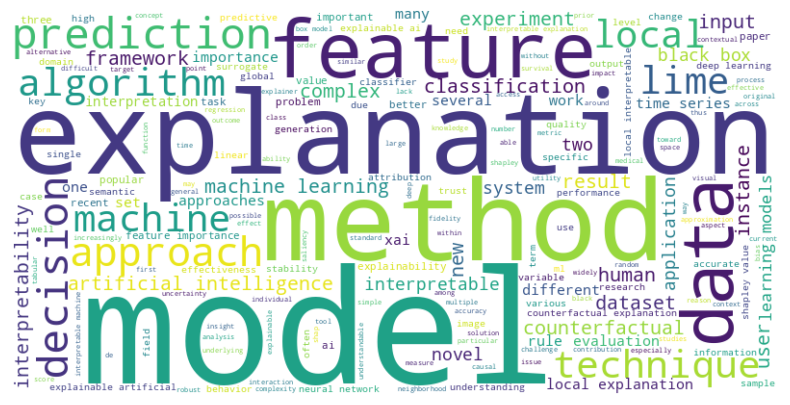

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Suponemos que 'filtered_tokens' es tu lista de palabras
tokens = filtered_tokens

# Crear una cadena larga con todas las palabras
text = ' '.join(tokens)

# Inicializar el generador de Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Visualización de la Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


COOCURRENCIA WORDS

In [134]:
documents

[['predictive',
  'models',
  'increasingly',
  'consequential',
  'decision',
  'making',
  'individual',
  'level',
  'contexts',
  'pretrial',
  'bail',
  'loan',
  'social',
  'legal',
  'pressure',
  'explanations',
  'affected',
  'individuals',
  'prediction',
  'also',
  'desired',
  'several',
  'works',
  'methods',
  'nearest',
  'counterfactual',
  'methods',
  'often',
  'particular',
  'subset',
  'models',
  'decision',
  'trees',
  'linear',
  'differentiable',
  'distance',
  'standard',
  'theory',
  'tools',
  'formal',
  'verification',
  'novel',
  'algorithm',
  'sequence',
  'satisfiability',
  'distance',
  'function',
  'predictive',
  'model',
  'logic',
  'experiments',
  'algorithm',
  'modelagnostic',
  'combinations',
  'able',
  'plausible',
  'diverse',
  'counterfactuals',
  'sample',
  'provably',
  'optimal'],
 ['rise',
  'sophisticated',
  'machine',
  'learning',
  'models',
  'accurate',
  'obscure',
  'decision',
  'thus',
  'adoption',
  'artific

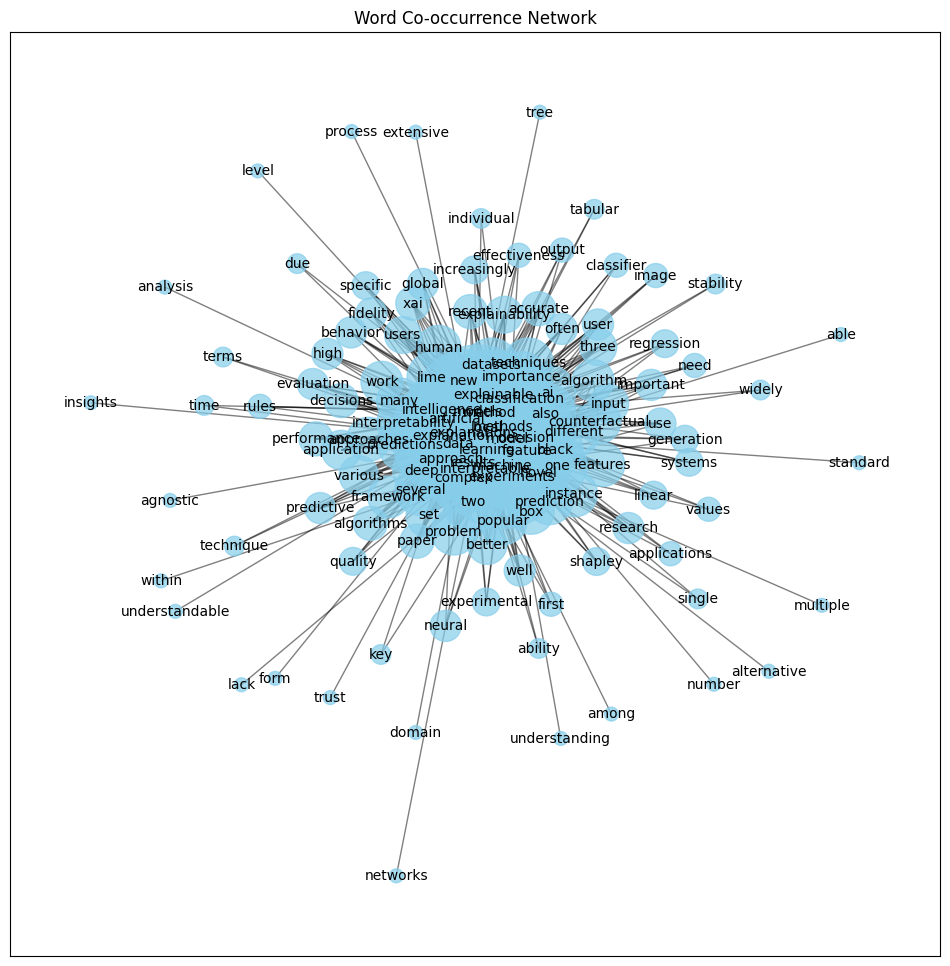

In [137]:
import itertools
import collections
import networkx as nx
import matplotlib.pyplot as plt



# Crear una lista de todas las palabras
all_words = list(itertools.chain(*documents))

# Crear una matriz de coocurrencia
co_occurrence = collections.defaultdict(lambda: collections.defaultdict(int))

# Llenar la matriz de coocurrencia
for document in documents:
    for pair in itertools.combinations(set(document), 2):
        co_occurrence[pair[0]][pair[1]] += 1
        co_occurrence[pair[1]][pair[0]] += 1

# Crear el grafo de coocurrencia
G = nx.Graph()

min_cooccurrence = 10  # Ajusta este valor según tus necesidades
for word, neighbors in co_occurrence.items():
    for neighbor, freq in neighbors.items():
        if freq >= min_cooccurrence:
            G.add_edge(word, neighbor, weight=freq)


# Configurar el tamaño de los nodos basado en el grado de conexión
node_size = [G.degree(node) * 100 for node in G.nodes()]

# Dibujar el grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)  # Define la posición de los nodos en el espacio
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Word Co-occurrence Network")
plt.show()

In [141]:
consolidate

,NUMBER,PAPER NAME,ABSTRACT,AUTHORS,KEYWORDS,NUMBER OF CITATIONS OF THE ARTICLE,PUBLICATION DATE,LINK,REPOSITORY,NAME OF THE METHOD OR TECHNIQUE,BASE METHODS OR TECHNIQUES,TASK TYPE,DATATYPE,INTERPRETATION MECHANISM,ALGORITHM,METRICS,DATASET
0,1,Model-Agnostic Counterfactual Explanations for...,Predictive models are being increasingly used ...,"Amir-Hossein Karimi, Gilles Barthe, Borja Ball...",Not specified,301,2020-08-26 00:00:00,https://proceedings.mlr.press/v108/karimi20a,https://github.com/amirhk/mace,MACE,Counterfactual analysis\nSAT (satisfaction pro...,Binary classification,Tabular,Local,Picture,\nNormalized Distance\nCoverage,Adult\nCredit \nCompas
1,2,Factual and counterfactual explanations for bl...,The rise of sophisticated machine learning mod...,"Riccardo Guidotti, Anna Monreale, Fosca Gianno...","Explainable AI, Interpretable Machine Learning...",255,2019-11-01 00:00:00,https://ieeexplore.ieee.org/document/8920138\n...,https://github.com/riccotti/LORE\n\nhttps://gi...,LORE,Counterfactual analysis\nFactual Analysis\nGen...,Binary classification,Tabular,Local,Not specified,Fidelity\nL-Fidelity\nHit,Adult\nGerman \nCompas
2,3,CERTIFAI: A Common Framework to Provide Explan...,Concerns within the machine learning community...,"Shubham Sharma, Jette Henderson, Joydeep Ghosh","Responsible Artificial Intelligence, explainab...",232,2020-02-07 00:00:00,https://dl.acm.org/doi/10.1145/3375627.3375812,https://github.com/Ighina/CERTIFAI,CERTIFAI,Counterfactual analysis\nGenetic algorithm\nFa...,Binary classification,Tabular,Local,Not specified,Distance Between Instances\nCerscore\nNcerscore,Pima Diabetes\nBreast Cancer\nIris
3,4,Multi-Objective Counterfactual Explanations,Counterfactual explanations are one of the mos...,"Susanne Dandl, Christoph Molnar, Martin Binder...","Interpretability, Interpretable machine learni...",261,2020-08-31 00:00:00,https://link.springer.com/chapter/10.1007/978-...,https://github.com/dandls/moc,MOC,Genetic algorithm\nCounterfactual analysis,Binary classification\nRegression,Tabular,Local,Not specified,Hypervolume Indicator,Boston\nCmc\nDiabetes\nIlpd\nKc2\nKr-Vs-Kp\nNo...
4,5,Deterministic Local Interpretable Model-Agnost...,Local Interpretable Model-Agnostic Explanation...,"Muhammad Rehman Zafar, Naimul Khan","explainable artificial intelligence (XAI), int...",99,2021-06-30 00:00:00,https://www.mdpi.com/2504-4990/3/3/27,https://github.com/rehmanzafar/dlime_experiments,DLIME,LIME\nHierarchical clustering\nKNN,Binary classification\nMulticlass classification,Tabular,Local,Picture,Features Stability Index \nQuality Of Explanat...,Synthetic-I\nSynthetic-Ii\nSynthetic-Iii\nSynt...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,Unified Explanations in Machine Learning Model...,A high-velocity paradigm shift towards Explain...,"Dineen Jacob,Kridel Don,Dolk Daniel, Castillo ...",Not specified,0,2023-01-03 00:00:00,https://scholarspace.manoa.hawaii.edu/items/65...,Not specified,Not specified,Absolute Normalized Shap\nAbsolute Normalized ...,Multiclass classification,Tabular,Global,Not specified,Cosine Similarity\nJaccard Similarity,Iris\nWine\nBreast Cancer\nUci Census\nSynthet...
146,147,A Twin XCBR System Using Supportive and Contra...,Machine learning models are increasingly being...,"Betül Bayrak, Kerstin Bach",Explainable Artificial Intelligent (XAI)\nExpl...,0,2023-07-17 00:00:00,https://ceur-ws.org/Vol-3438/paper_11.pdf,https://github.com/b-bayrak/Twin_XAI,Twin XCBR,Contrastive and Supporting Explanations\nMulti...,Binary classification\nMulticlass classification,Tabular,Local\nGlobal,Not specified,Rigidity,Depression Screening \nSelfback App Usage Pred...
147,148,Constraint-Driven Explanations for Black-Box M...,The need to understand the inner workings of o...,"Aditya A. Shrotri, Nina Narodytska, Alexey Ign...",Not specified,16,2022-06-28 00:00:00,https://ojs.aaai.org/index.php/AAAI/article/vi...,https://gitlab.com/Shrotri/clime,CLIME,LIME\nBoolean Constraints\

In [139]:
df = consolidate

In [148]:
len(documents[0:140])

140

In [146]:
df['year'][0:140]

0      2020
1      2019
2      2020
3      2020
4      2021
       ... 
144    2023
145    2023
146    2023
147    2022
148    2022
Name: year, Length: 140, dtype: int32

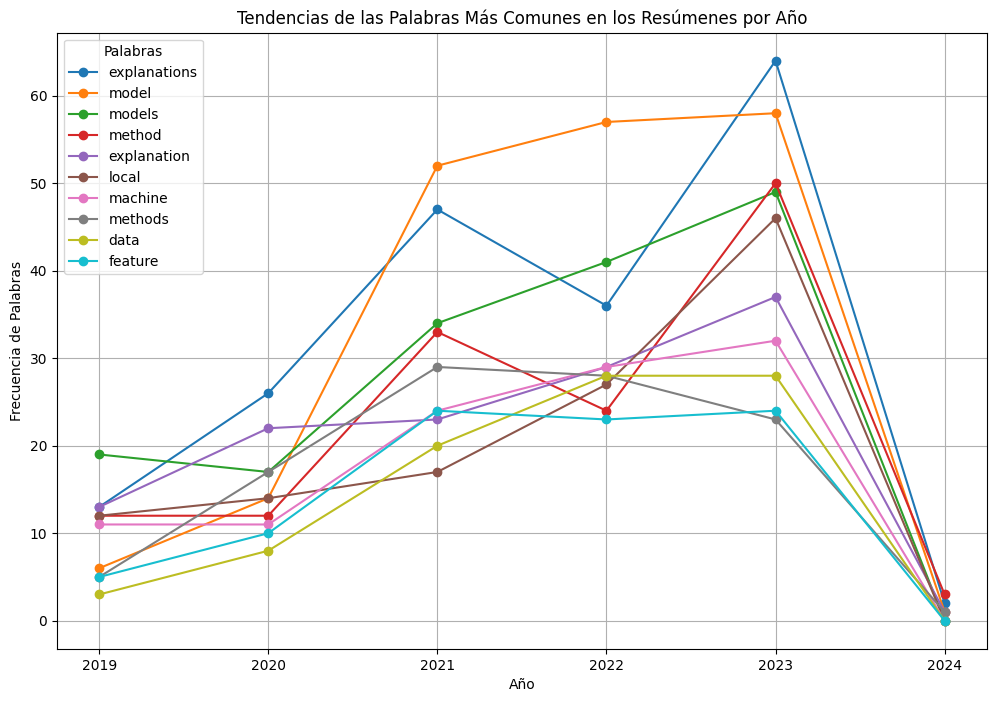

In [149]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame `df` con la columna 'PUBLICATION DATE' y 'ABSTRACT'
# Ejemplo de cómo se vería tu DataFrame
# data = {'PUBLICATION DATE': ['26/08/2020', '01/11/2019', '07/02/2020'],
#         'ABSTRACT': ['abstract 1', 'abstract 2', 'abstract 3']}
# df = pd.DataFrame(data)

# Convertir la columna 'PUBLICATION DATE' a datetime, especificando el formato y manejando errores
df['PUBLICATION DATE'] = pd.to_datetime(df['PUBLICATION DATE'], format='%d/%m/%Y', errors='coerce')

# Filtrar filas con fechas no válidas
df = df.dropna(subset=['PUBLICATION DATE'])

# Extraer el año
df['year'] = df['PUBLICATION DATE'].dt.year

# Crear una lista de documentos (listas de palabras)

# Crear un DataFrame que asocie cada año con los documentos correspondientes
df_documents = pd.DataFrame({'year': df['year'][0:140], 'documents': documents[0:140]})

# Inicializar un contador para las palabras por año
yearly_word_freq = {}

# Contar la frecuencia de palabras para cada año
for year, group in df_documents.groupby('year'):
    words = [word for doc in group['documents'] for word in doc]
    yearly_word_freq[year] = Counter(words)

# Convertir el contador a un DataFrame para facilidad de uso
df_yearly_word_freq = pd.DataFrame(yearly_word_freq).fillna(0).astype(int)

# Seleccionar las palabras más comunes
top_n_words = 10
common_words = df_yearly_word_freq.sum(axis=1).nlargest(top_n_words).index
df_top_words = df_yearly_word_freq.loc[common_words]

# Transponer para facilitar la visualización
df_top_words = df_top_words.T

# Graficar las tendencias de las palabras más comunes a lo largo del tiempo
plt.figure(figsize=(12, 8))
df_top_words.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Tendencias de las Palabras Más Comunes en los Resúmenes por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia de Palabras')
plt.grid(True)
plt.legend(title='Palabras')
plt.show()

# **AUTOR ANALISYS**

In [152]:
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

REVISAR

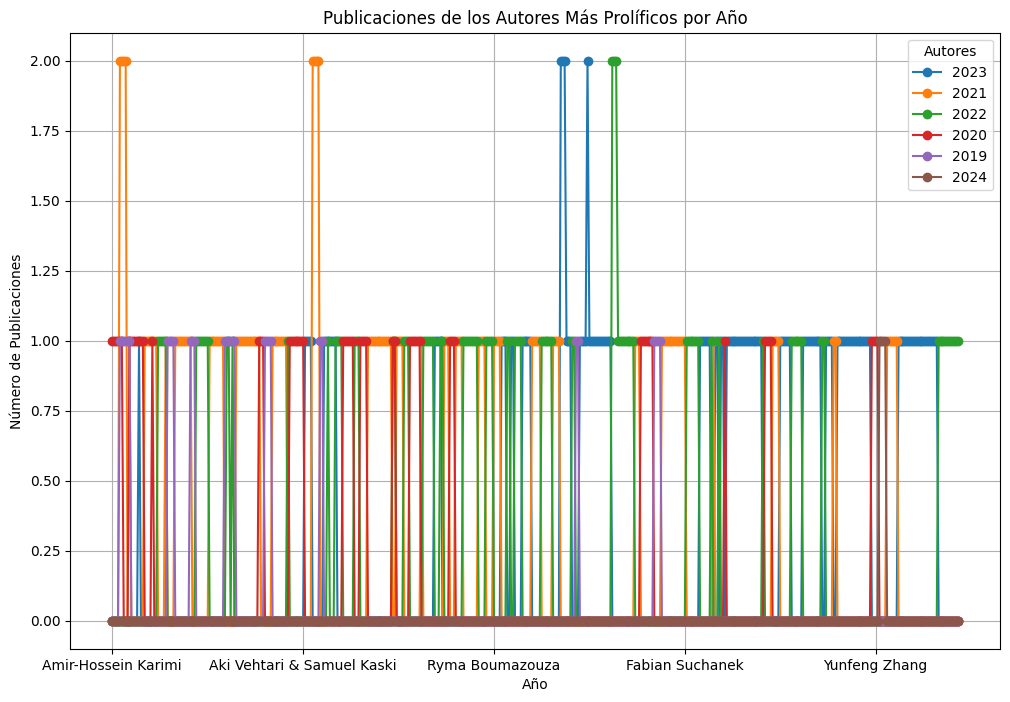

In [153]:
df['PUBLICATION DATE'] = pd.to_datetime(df['PUBLICATION DATE'], format='%d/%m/%Y', errors='coerce')

# Filtrar filas con fechas no válidas
df = df.dropna(subset=['PUBLICATION DATE'])

# Extraer el año
df['year'] = df['PUBLICATION DATE'].dt.year

# Crear un diccionario para contar las publicaciones por autor y año
author_year_counts = defaultdict(Counter)

# Procesar la columna 'AUTHORS' y contar las publicaciones por autor y año
for _, row in df.iterrows():
    year = row['year']
    authors = [author.strip() for author in row['AUTHORS'].split(',')]
    for author in authors:
        author_year_counts[author][year] += 1

# Convertir el diccionario a un DataFrame para facilidad de uso
df_author_year = pd.DataFrame(author_year_counts).fillna(0).astype(int)

# Seleccionar los autores más prolíficos
top_n_authors = 10
common_authors = df_author_year.sum(axis=1).nlargest(top_n_authors).index
df_top_authors = df_author_year.loc[common_authors]

# Transponer para facilitar la visualización
df_top_authors = df_top_authors.T

# Graficar las publicaciones de los autores más prolíficos a lo largo del tiempo
plt.figure(figsize=(12, 8))
df_top_authors.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Publicaciones de los Autores Más Prolíficos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Publicaciones')
plt.grid(True)
plt.legend(title='Autores')
plt.show()

In [155]:
author_year_counts

defaultdict(collections.Counter,
            {'Amir-Hossein Karimi': Counter({2020: 1}),
             'Gilles Barthe': Counter({2020: 1}),
             'Borja Balle': Counter({2020: 1}),
             'Isabel Valera': Counter({2020: 1}),
             'Riccardo Guidotti': Counter({2019: 1, 2021: 2, 2020: 1}),
             'Anna Monreale': Counter({2019: 1, 2021: 2, 2020: 1}),
             'Fosca Giannotti': Counter({2019: 1, 2021: 2}),
             'Dino Pedreschi': Counter({2019: 1, 2021: 2}),
             'Salvatore Ruggieri': Counter({2019: 1}),
             'Franco Turini': Counter({2019: 1, 2021: 1, 2020: 1}),
             'Shubham Sharma': Counter({2020: 1}),
             'Jette Henderson': Counter({2020: 1}),
             'Joydeep Ghosh': Counter({2020: 1}),
             'Susanne Dandl': Counter({2020: 1}),
             'Christoph Molnar': Counter({2020: 1, 2023: 1}),
             'Martin Binder': Counter({2020: 1}),
             'Bernd Bischl': Counter({2020: 1}),
             'M

# **KEYWORDS ANALYSIS**

Una opción podria mezclar resumen y keywords

In [158]:
abstracts = df['KEYWORDS'].dropna()


stop_words = set(stopwords.words('english'))

word_freq = Counter()
filtered_tokens = []
documents = []

for abstract in abstracts:
    if isinstance(abstract, str):

        tokens = abstract.lower().split()
        tagged_tokens = pos_tag(tokens)
        document = []

        for word,tag in tagged_tokens:
          if word.isalpha() and word not in stop_words and not tag.startswith('V'): #is necesary filter more?
            filtered_tokens.append(word)
            document.append(word)
        documents.append(document)


        word_freq.update(filtered_tokens)

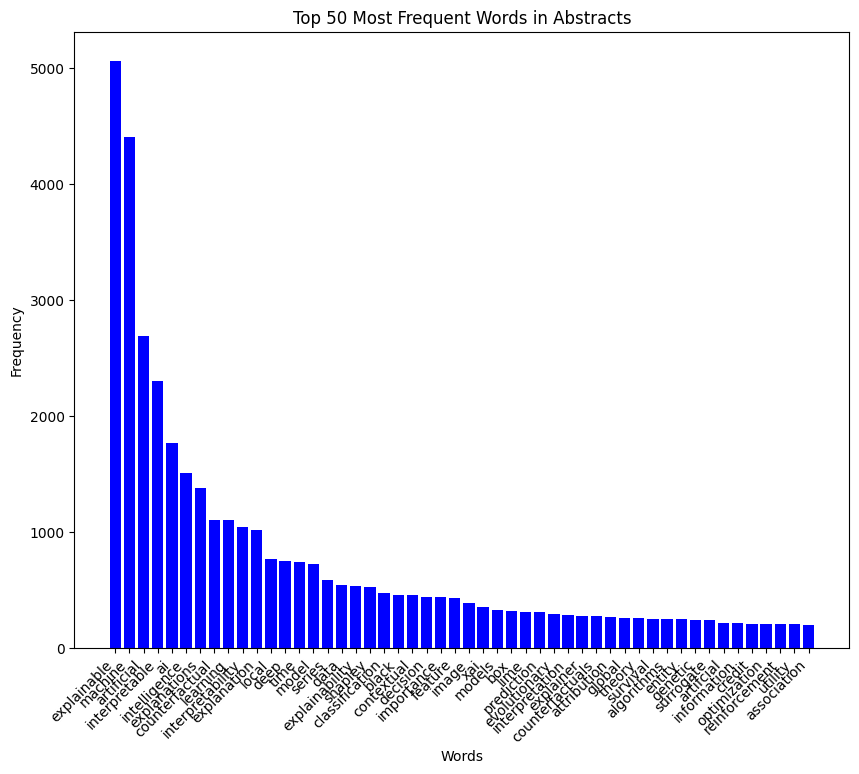

In [160]:
n_most_common = 50
most_common_words = word_freq.most_common(n_most_common)

# Separar las palabras y sus frecuencias en dos listas
words, frequencies = zip(*most_common_words)

# Crear un diagrama de barras
plt.figure(figsize=(10, 8))  # Ajusta el tamaño del gráfico si es necesario
plt.bar(words, frequencies, color='blue')  # Puedes cambiar el color si quieres

# Agregar título y etiquetas a los ejes
plt.title(f'Top {n_most_common} Most Frequent Words in Abstracts')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Mejorar la legibilidad de las etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


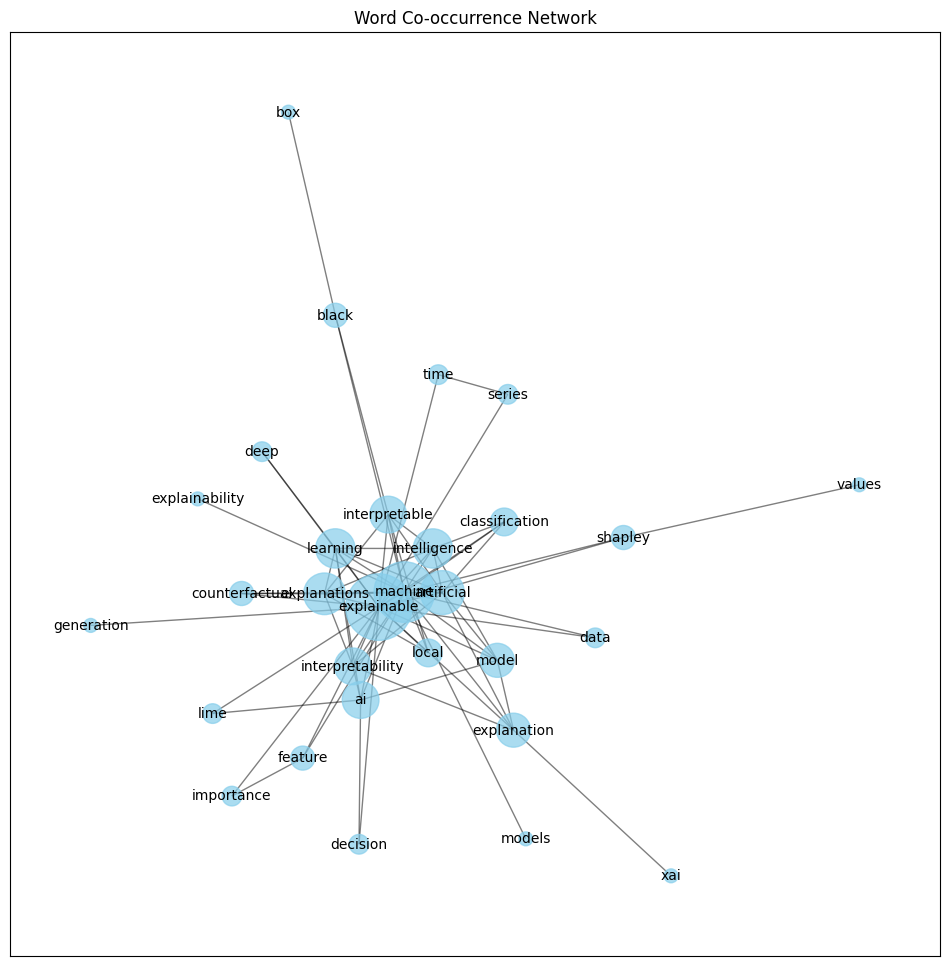

In [162]:
import itertools
import collections
import networkx as nx
import matplotlib.pyplot as plt



# Crear una lista de todas las palabras
all_words = list(itertools.chain(*documents))

# Crear una matriz de coocurrencia
co_occurrence = collections.defaultdict(lambda: collections.defaultdict(int))

# Llenar la matriz de coocurrencia
for document in documents:
    for pair in itertools.combinations(set(document), 2):
        co_occurrence[pair[0]][pair[1]] += 1
        co_occurrence[pair[1]][pair[0]] += 1

# Crear el grafo de coocurrencia
G = nx.Graph()

min_cooccurrence = 4  # Ajusta este valor según tus necesidades
for word, neighbors in co_occurrence.items():
    for neighbor, freq in neighbors.items():
        if freq >= min_cooccurrence:
            G.add_edge(word, neighbor, weight=freq)


# Configurar el tamaño de los nodos basado en el grado de conexión
node_size = [G.degree(node) * 100 for node in G.nodes()]

# Dibujar el grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)  # Define la posición de los nodos en el espacio
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Word Co-occurrence Network")
plt.show()

# **ANALYSIS OF NUMBER OF CITATIONS OF THE ARTICLE**

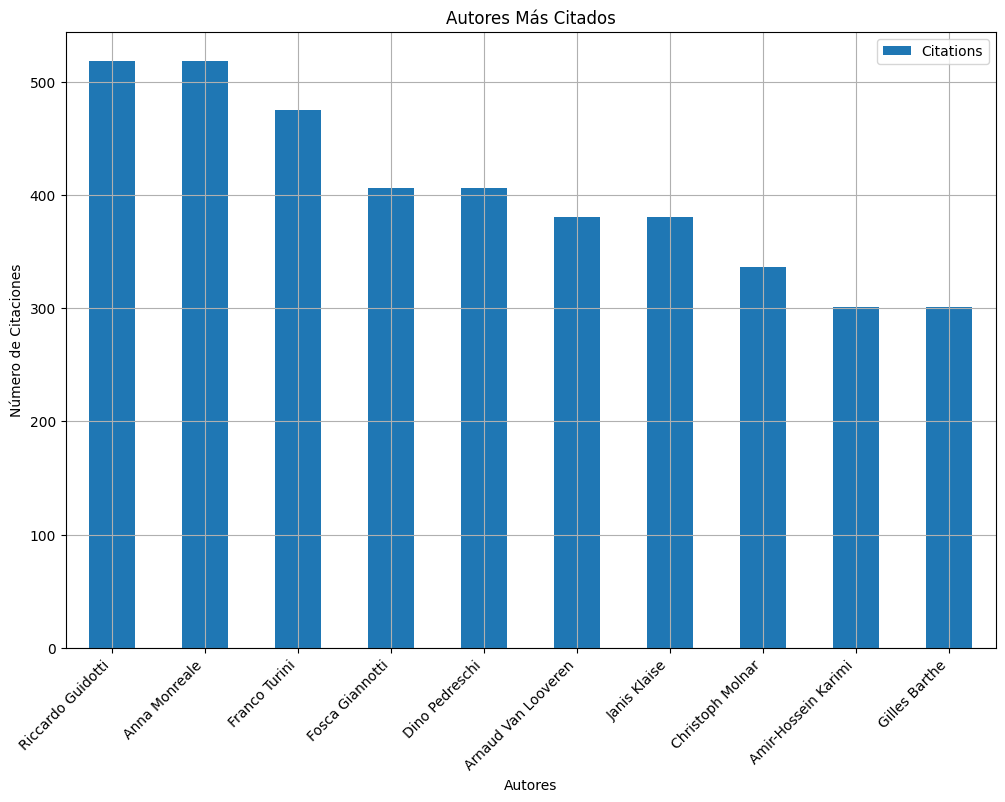

In [163]:
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame `df` con las columnas 'PUBLICATION DATE', 'AUTHORS', y 'NUMBER OF CITATIONS OF THE ARTICLE'
# Ejemplo de cómo se vería tu DataFrame
# data = {'PUBLICATION DATE': ['26/08/2020', '01/11/2019', '07/02/2020'],
#         'AUTHORS': ['Amir-Hossein Karimi, Gilles Barthe, Borja Balle, Isabel Valera',
#                    'Riccardo Guidotti, Anna Monreale, Fosca Giannotti, Dino Pedreschi, Salvatore Ruggieri, Franco Turini',
#                    'Shubham Sharma, Jette Henderson, Joydeep Ghosh'],
#         'NUMBER OF CITATIONS OF THE ARTICLE': [301, 255, 232]}
# df = pd.DataFrame(data)

# Convertir la columna 'PUBLICATION DATE' a datetime, especificando el formato y manejando errores
df['PUBLICATION DATE'] = pd.to_datetime(df['PUBLICATION DATE'], format='%d/%m/%Y', errors='coerce')

# Filtrar filas con fechas no válidas
df = df.dropna(subset=['PUBLICATION DATE'])

# Extraer el año
df['year'] = df['PUBLICATION DATE'].dt.year

# Crear un diccionario para contar las citaciones por autor
author_citations = defaultdict(int)

# Procesar la columna 'AUTHORS' y acumular las citaciones por autor
for _, row in df.iterrows():
    citations = row['NUMBER OF CITATIONS OF THE ARTICLE']
    authors = [author.strip() for author in row['AUTHORS'].split(',')]
    for author in authors:
        author_citations[author] += citations

# Convertir el diccionario a un DataFrame para facilidad de uso
df_author_citations = pd.DataFrame.from_dict(author_citations, orient='index', columns=['Citations'])

# Seleccionar los autores más citados
top_n_authors = 10
df_top_authors = df_author_citations.nlargest(top_n_authors, 'Citations')

# Graficar los autores más citados
plt.figure(figsize=(12, 8))
df_top_authors.plot(kind='bar', ax=plt.gca())
plt.title('Autores Más Citados')
plt.xlabel('Autores')
plt.ylabel('Número de Citaciones')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


ANALYSIS TYPE OF TASK

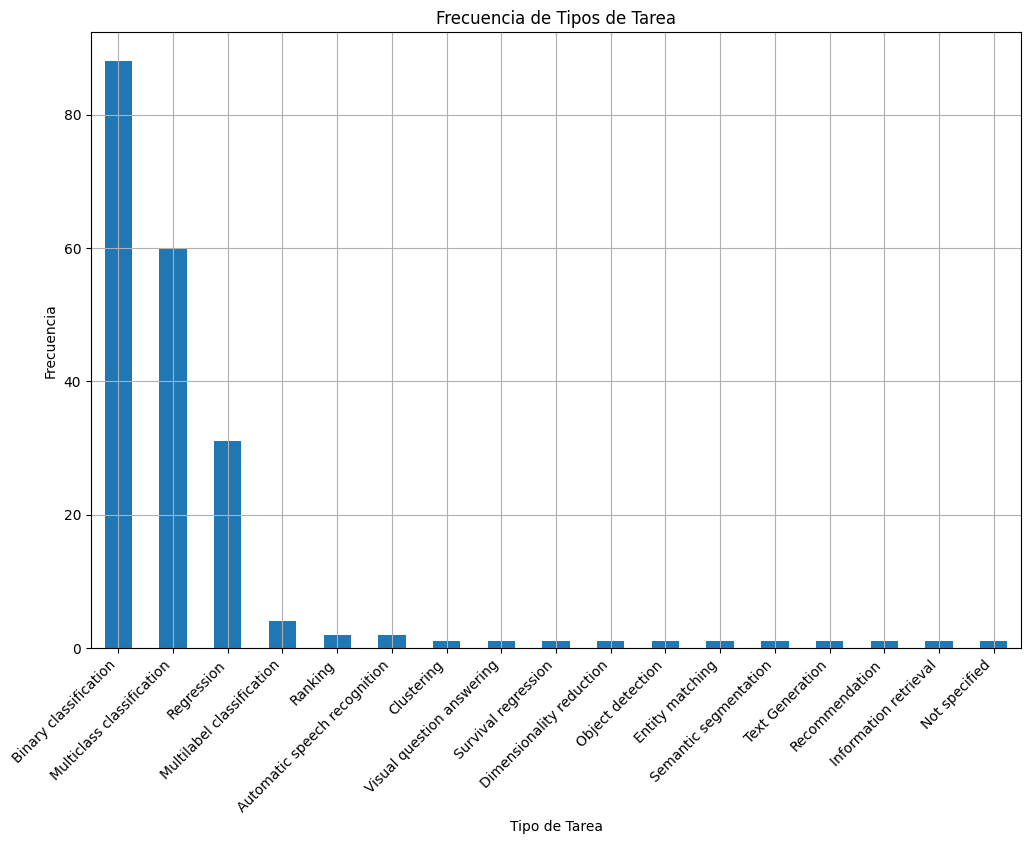

In [165]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame `df` con la columna 'TASK TYPE'
# Ejemplo de cómo se vería tu DataFrame
# data = {'TASK TYPE': ['Binary classification\nMulti-class classification',
#                       'Regression\nBinary classification',
#                       'Regression']}
# df = pd.DataFrame(data)

# Inicializar un contador para los tipos de tarea
task_type_counter = Counter()

# Procesar la columna 'TASK TYPE' y contar la frecuencia de cada tipo de tarea
for task_list in df['TASK TYPE']:
    tasks = task_list.split('\n')  # Dividir las tareas por salto de línea
    task_type_counter.update(tasks)

# Convertir el contador a un DataFrame para facilidad de uso
df_task_type_freq = pd.DataFrame.from_dict(task_type_counter, orient='index', columns=['Frequency'])

# Ordenar por frecuencia
df_task_type_freq = df_task_type_freq.sort_values(by='Frequency', ascending=False)

# Graficar la frecuencia de los tipos de tarea
plt.figure(figsize=(12, 8))
df_task_type_freq.plot(kind='bar', ax=plt.gca(), legend=False)
plt.title('Frecuencia de Tipos de Tarea')
plt.xlabel('Tipo de Tarea')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


# **ANALYSIS DATATYPE**

Podria interesar tipo de dato asociado a palbra clave o documento?

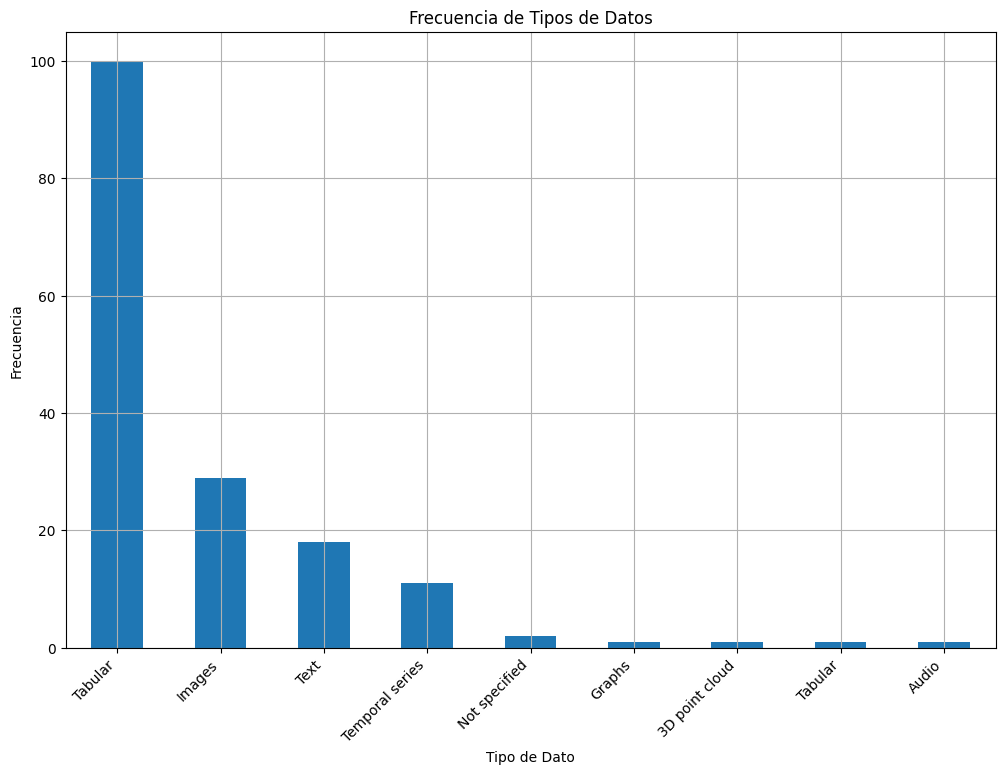

In [166]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame `df` con la columna 'DATATYPE'
# Ejemplo de cómo se vería tu DataFrame
# data = {'DATATYPE': ['Tabular\nImage\nText',
#                      'Text\nTime Series',
#                      'Tabular\nImage']}
# df = pd.DataFrame(data)

# Inicializar un contador para los tipos de datos
datatype_counter = Counter()

# Procesar la columna 'DATATYPE' y contar la frecuencia de cada tipo de dato
for datatype_list in df['DATATYPE']:
    datatypes = datatype_list.split('\n')  # Dividir los tipos de dato por salto de línea
    datatype_counter.update(datatypes)

# Convertir el contador a un DataFrame para facilidad de uso
df_datatype_freq = pd.DataFrame.from_dict(datatype_counter, orient='index', columns=['Frequency'])

# Ordenar por frecuencia
df_datatype_freq = df_datatype_freq.sort_values(by='Frequency', ascending=False)

# Graficar la frecuencia de los tipos de datos
plt.figure(figsize=(12, 8))
df_datatype_freq.plot(kind='bar', ax=plt.gca(), legend=False)
plt.title('Frecuencia de Tipos de Datos')
plt.xlabel('Tipo de Dato')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


# **ANALYSIS INTERPRETATION MECHANISM**

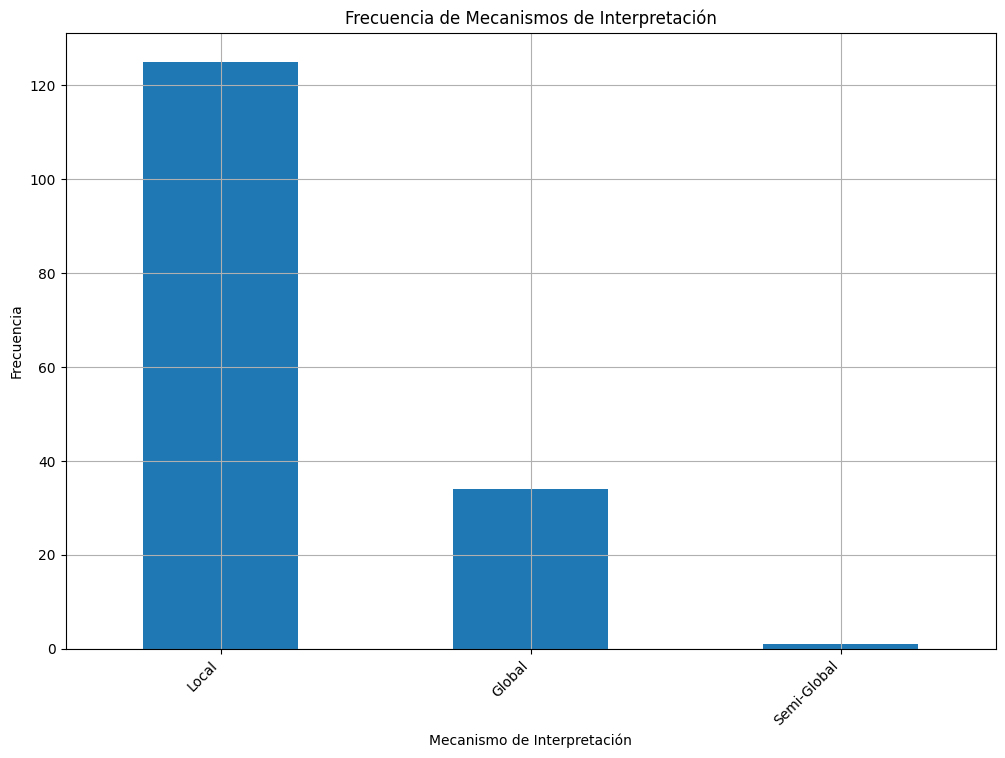

In [167]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame `df` con la columna 'INTERPRETATION MECHANISM'
# Ejemplo de cómo se vería tu DataFrame
# data = {'INTERPRETATION MECHANISM': ['Local\nGlobal',
#                                      'Global\nModel-Agnostic',
#                                      'Local\nSpecific']}
# df = pd.DataFrame(data)

# Inicializar un contador para los mecanismos de interpretación
interpretation_mechanism_counter = Counter()

# Procesar la columna 'INTERPRETATION MECHANISM' y contar la frecuencia de cada mecanismo de interpretación
for mechanism_list in df['INTERPRETATION MECHANISM']:
    mechanisms = mechanism_list.split('\n')  # Dividir los mecanismos de interpretación por salto de línea
    interpretation_mechanism_counter.update(mechanisms)

# Convertir el contador a un DataFrame para facilidad de uso
df_interpretation_mechanism_freq = pd.DataFrame.from_dict(interpretation_mechanism_counter, orient='index', columns=['Frequency'])

# Ordenar por frecuencia
df_interpretation_mechanism_freq = df_interpretation_mechanism_freq.sort_values(by='Frequency', ascending=False)

# Graficar la frecuencia de los mecanismos de interpretación
plt.figure(figsize=(12, 8))
df_interpretation_mechanism_freq.plot(kind='bar', ax=plt.gca(), legend=False)
plt.title('Frecuencia de Mecanismos de Interpretación')
plt.xlabel('Mecanismo de Interpretación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


# **ANALYSIS OF METRICS**

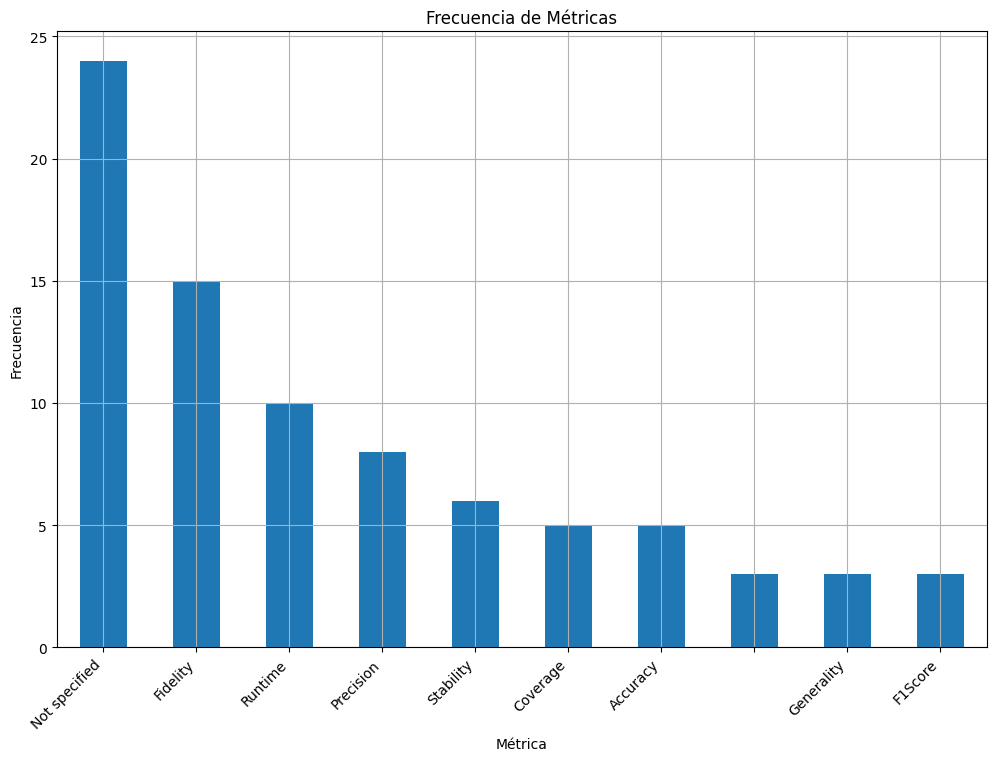

In [174]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame `df` con la columna 'METRICS'
# Ejemplo de cómo se vería tu DataFrame
# data = {'METRICS': ['Accuracy\nPrecision\nRecall',
#                     'Precision\nF1-Score',
#                     'Accuracy\nF1-Score\nAUC']}
# df = pd.DataFrame(data)

# Inicializar un contador para las métricas
metrics_counter = Counter()

# Procesar la columna 'METRICS' y contar la frecuencia de cada métrica
for metrics_list in df['METRICS']:
    metrics = metrics_list.split('\n')  # Dividir las métricas por salto de línea
    metrics_counter.update(metrics)

# Convertir el contador a un DataFrame para facilidad de uso
df_metrics_freq = pd.DataFrame.from_dict(metrics_counter, orient='index', columns=['Frequency'])

# Ordenar por frecuencia
df_metrics_freq = df_metrics_freq.sort_values(by='Frequency', ascending=False).head(10)

# Graficar la frecuencia de las métricas
plt.figure(figsize=(12, 8))
df_metrics_freq.plot(kind='bar', ax=plt.gca(), legend=False)
plt.title('Frecuencia de Métricas')
plt.xlabel('Métrica')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


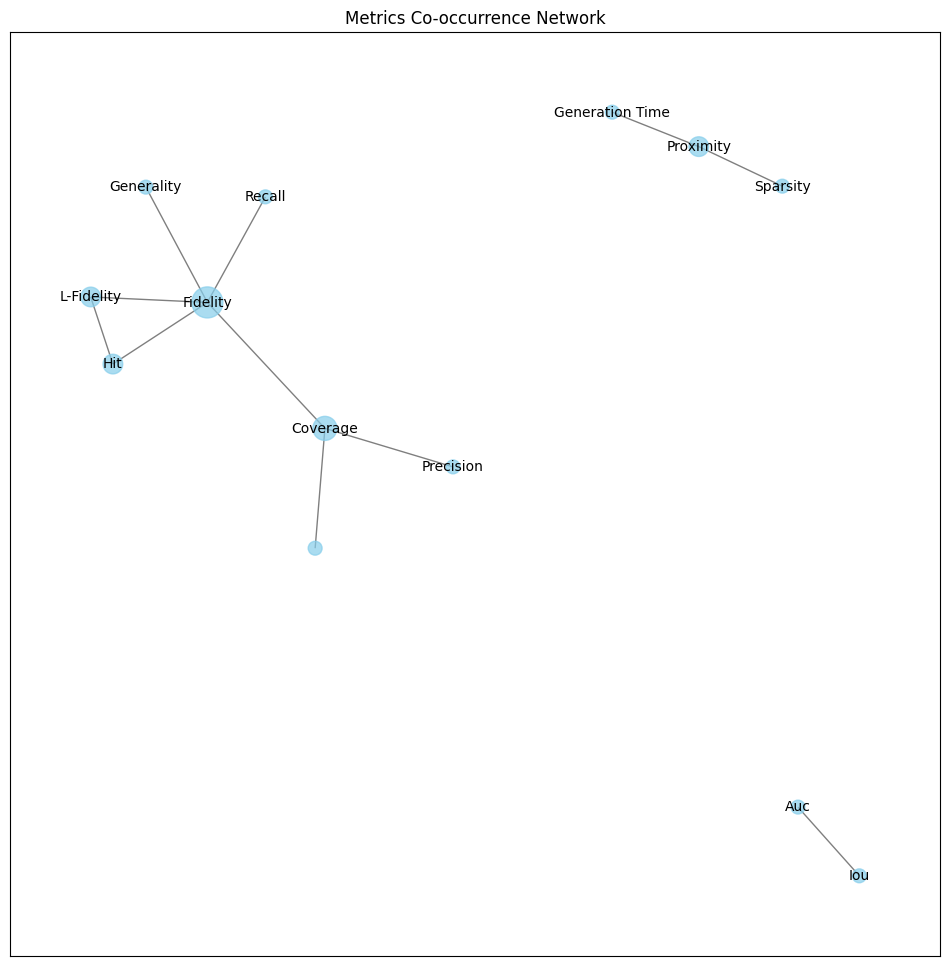

In [171]:
import itertools
import collections
import networkx as nx
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame `df` con la columna 'METRICS'
# Ejemplo de cómo se vería tu DataFrame
# data = {'METRICS': ['Accuracy\nPrecision\nRecall',
#                     'Precision\nF1-Score',
#                     'Accuracy\nF1-Score\nAUC']}
# df = pd.DataFrame(data)

# Crear una lista de documentos (listas de métricas)
documents = df['METRICS'].apply(lambda x: x.split('\n')).tolist()

# Crear una lista de todas las métricas
all_metrics = list(itertools.chain(*documents))

# Crear una matriz de coocurrencia
co_occurrence = collections.defaultdict(lambda: collections.defaultdict(int))

# Llenar la matriz de coocurrencia
for document in documents:
    for pair in itertools.combinations(set(document), 2):
        co_occurrence[pair[0]][pair[1]] += 1
        co_occurrence[pair[1]][pair[0]] += 1

# Crear el grafo de coocurrencia
G = nx.Graph()

min_cooccurrence = 2  # Ajusta este valor según tus necesidades
for metric, neighbors in co_occurrence.items():
    for neighbor, freq in neighbors.items():
        if freq >= min_cooccurrence:
            G.add_edge(metric, neighbor, weight=freq)

# Configurar el tamaño de los nodos basado en el grado de conexión
node_size = [G.degree(node) * 100 for node in G.nodes()]

# Dibujar el grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)  # Define la posición de los nodos en el espacio
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Metrics Co-occurrence Network")
plt.show()


# **ANALYSIS OF DATASET**

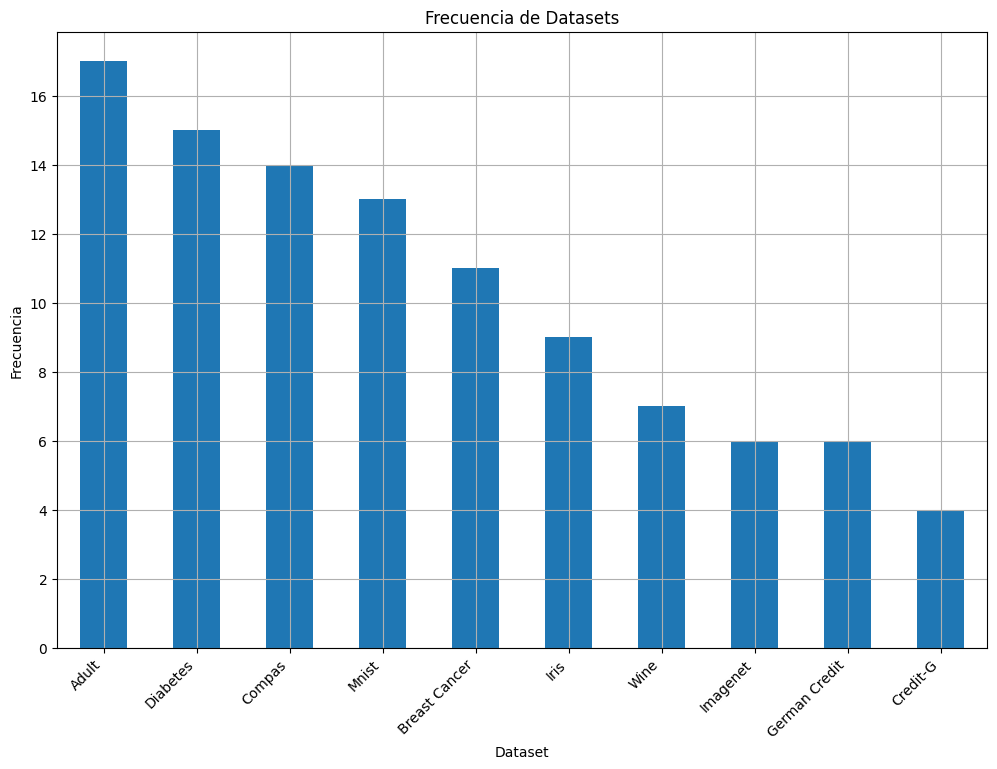

In [173]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame `df` con la columna 'DATASET'
# Ejemplo de cómo se vería tu DataFrame
# data = {'DATASET': ['Dataset1\nDataset2\nDataset3',
#                     'Dataset2\nDataset4',
#                     'Dataset1\nDataset3\nDataset4']}
# df = pd.DataFrame(data)

# Inicializar un contador para los datasets
dataset_counter = Counter()

# Procesar la columna 'DATASET' y contar la frecuencia de cada dataset
for dataset_list in df['DATASET']:
    datasets = dataset_list.split('\n')  # Dividir los datasets por salto de línea
    dataset_counter.update(datasets)

# Convertir el contador a un DataFrame para facilidad de uso
df_dataset_freq = pd.DataFrame.from_dict(dataset_counter, orient='index', columns=['Frequency'])

# Ordenar por frecuencia
df_dataset_freq = df_dataset_freq.sort_values(by='Frequency', ascending=False).head(10)

# Graficar la frecuencia de los datasets
plt.figure(figsize=(12, 8))
df_dataset_freq.plot(kind='bar', ax=plt.gca(), legend=False)
plt.title('Frecuencia de Datasets')
plt.xlabel('Dataset')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


# **ANALYSIS BASE METHODS OR TECHNIQUES**

In [178]:
df = consolidate

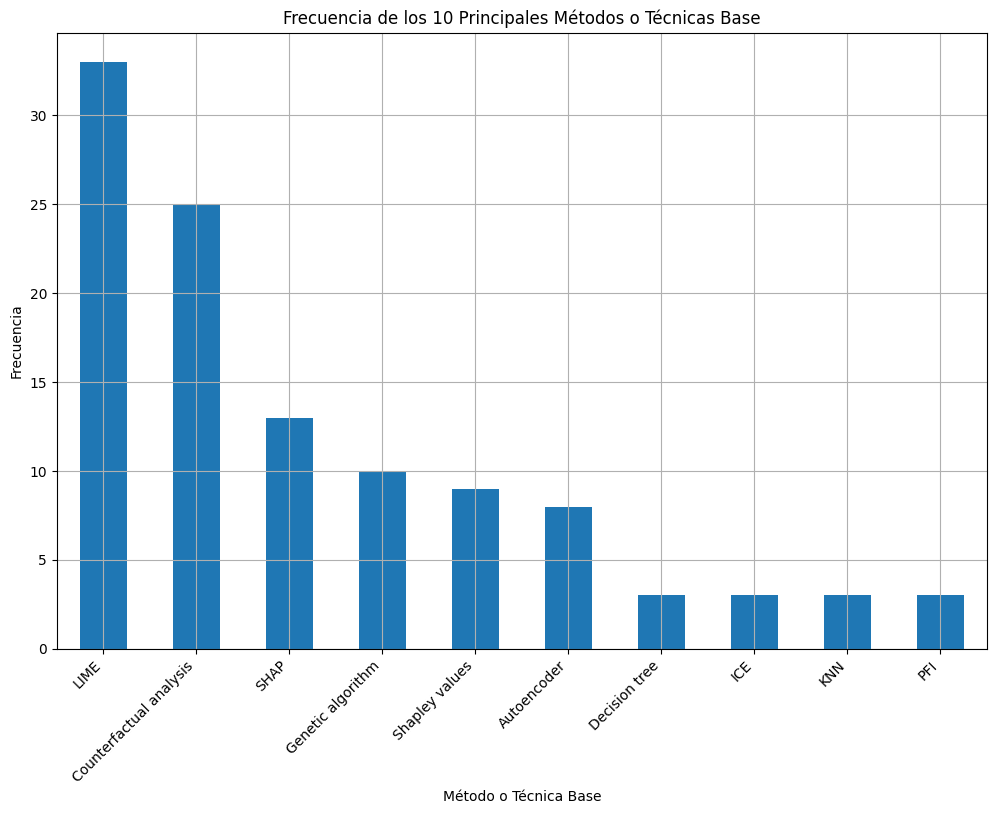

In [181]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame `df` con la columna 'BASE METHODS OR TECHNIQUES'
# Ejemplo de cómo se vería tu DataFrame
# data = {'BASE METHODS OR TECHNIQUES': ['Method1\nMethod2\nMethod3',
#                                        'Method2\nMethod4',
#                                        'Method1\nMethod3\nMethod4']}
# df = pd.DataFrame(data)

# Inicializar un contador para los métodos o técnicas base
df['BASE METHODS OR TECHNIQUES'] = df['BASE METHODS OR TECHNIQUES'].replace('Shapley Values', 'Shapley values', regex=True)
df['BASE METHODS OR TECHNIQUES'] = df['BASE METHODS OR TECHNIQUES'].replace('Autoencoders', 'Autoencoder', regex=True)
methods_counter = Counter()

# Procesar la columna 'BASE METHODS OR TECHNIQUES' y contar la frecuencia de cada método o técnica
for methods_list in df['BASE METHODS OR TECHNIQUES']:
    methods = methods_list.split('\n')  # Dividir los métodos o técnicas por salto de línea
    methods_counter.update(methods)

# Convertir el contador a un DataFrame para facilidad de uso
df_methods_freq = pd.DataFrame.from_dict(methods_counter, orient='index', columns=['Frequency'])

# Ordenar por frecuencia y seleccionar los 10 primeros valores
df_methods_freq = df_methods_freq.sort_values(by='Frequency', ascending=False).head(10)

# Graficar la frecuencia de los métodos o técnicas base
plt.figure(figsize=(12, 8))
df_methods_freq.plot(kind='bar', ax=plt.gca(), legend=False)
plt.title('Frecuencia de los 10 Principales Métodos o Técnicas Base')
plt.xlabel('Método o Técnica Base')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()
